# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#  We used this in our class work assignemnt. How Can I do this for my module 6 assignemnt
    
      
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chinde
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | gemena
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | puerto francisco de orellana
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | anupgarh
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | beeville
Processing Record 22 of Set 1 | mazara del vallo


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,10.11,93,100,1.82,CL,1734312410
1,uturoa,-16.7333,-151.4333,26.49,81,95,4.05,PF,1734312411
2,grytviken,-54.2811,-36.5092,5.54,72,100,1.93,GS,1734312412
3,adamstown,-25.0660,-130.1015,22.74,67,79,4.21,PN,1734312413
4,shahba,32.8551,36.6290,5.65,26,8,2.56,SY,1734312414


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.11,93,100,1.82,CL,1734312410
1,uturoa,-16.7333,-151.4333,26.49,81,95,4.05,PF,1734312411
2,grytviken,-54.2811,-36.5092,5.54,72,100,1.93,GS,1734312412
3,adamstown,-25.0660,-130.1015,22.74,67,79,4.21,PN,1734312413
4,shahba,32.8551,36.6290,5.65,26,8,2.56,SY,1734312414


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

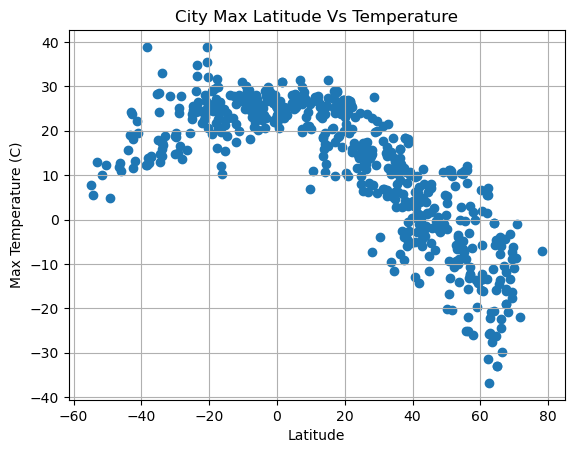

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title("City Max Latitude Vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

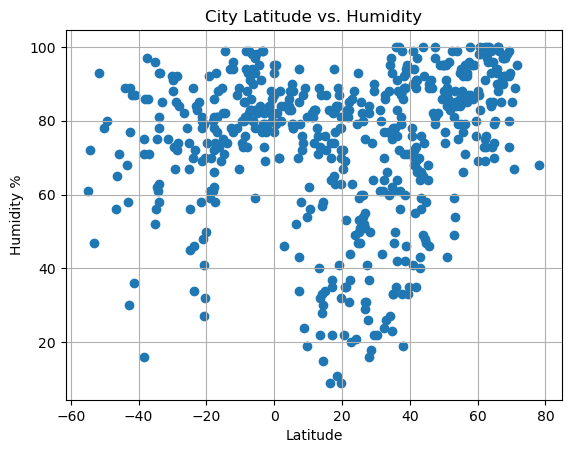

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

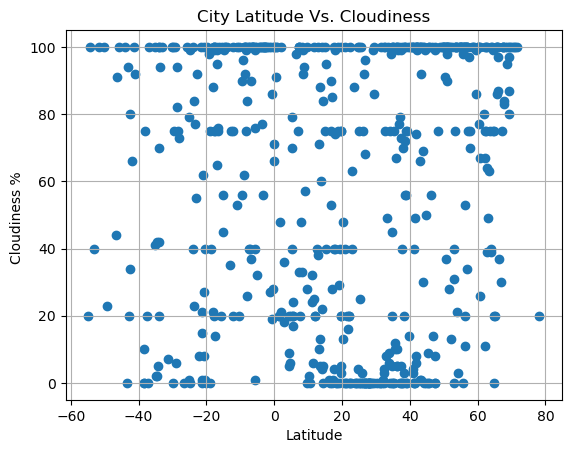

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness % ")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

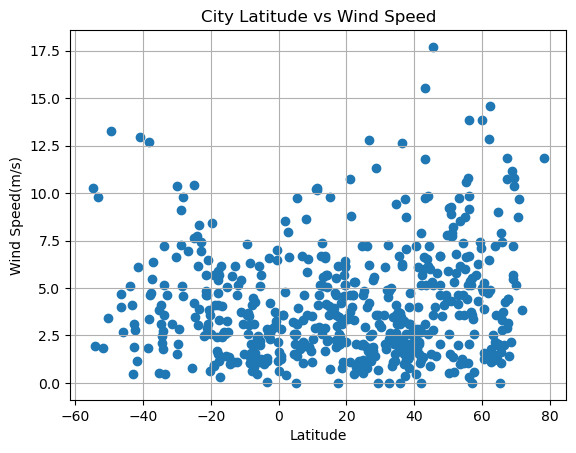

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress_calculation(x_coordinate, y_coordinate):
    slope, intercept, r_value , p_value, stderr = linregress(x_coordinate , y_coordinate)
    return slope, intercept, r_value

In [13]:
#print(linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness']))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,shahba,32.8551,36.6290,5.65,26,8,2.56,SY,1734312414
6,alaghsas,17.0187,8.0168,17.36,22,28,5.53,NE,1734312416
7,lompoc,34.6391,-120.4579,13.90,75,0,4.12,US,1734312417
8,buruenesti,45.3167,26.3500,1.80,64,0,5.32,RO,1734312419
9,mokokchung,26.3333,94.5333,11.34,54,0,1.70,IN,1734312420


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.11,93,100,1.82,CL,1734312410
1,uturoa,-16.7333,-151.4333,26.49,81,95,4.05,PF,1734312411
2,grytviken,-54.2811,-36.5092,5.54,72,100,1.93,GS,1734312412
3,adamstown,-25.0660,-130.1015,22.74,67,79,4.21,PN,1734312413
5,san antonio de pale,-1.4014,5.6325,26.68,84,100,2.96,GQ,1734312415


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7232843322335848


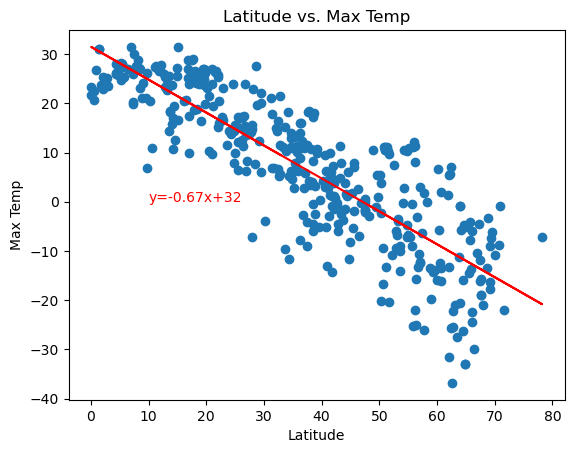

In [16]:
# Linear regression on Northern Hemisphere

plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Max Temp"])
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(10,0), color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Latitude vs. Max Temp")
print(f'The r^2 value is: {r_value**2}')




The r^2 value is: 0.3227104590078914


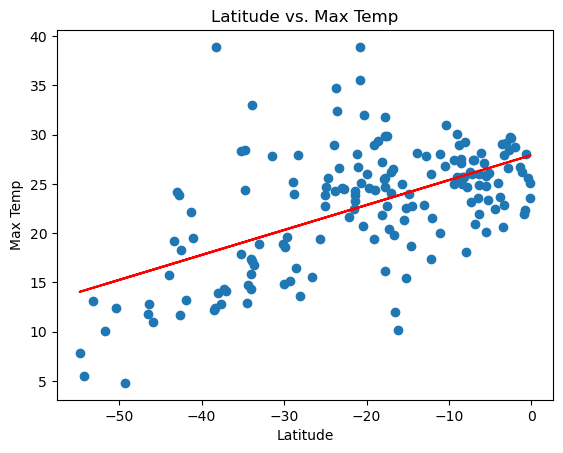

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Max Temp"])
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(10,0), color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Latitude vs. Max Temp")
print(f'The r^2 value is: {r_value**2}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.13206331845405125


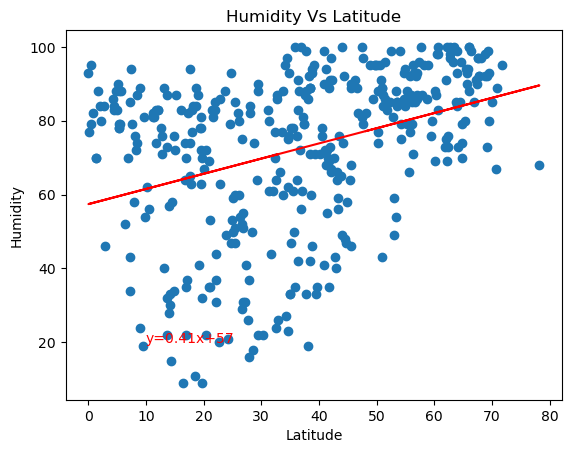

In [18]:
# Northern Hemisphere
plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Humidity"])
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(10,20), color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity Vs Latitude")
print(f'The r^2 value is: {r_value**2}')

The r^2 value is: 0.11176491582808741


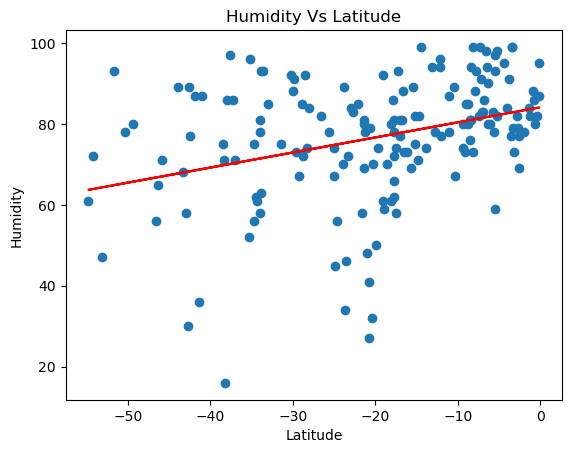

In [19]:
# Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Humidity"])
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(10,0), color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity Vs Latitude")
print(f'The r^2 value is: {r_value**2}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.10628538129533416
0.6980071781274215


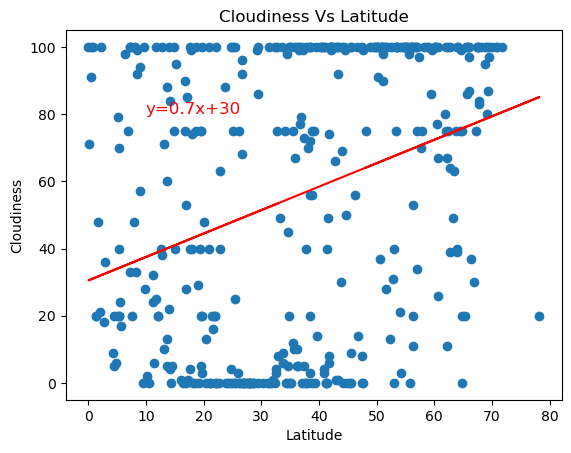

In [20]:
# Northern Hemisphere
plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Cloudiness"])
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(10,80), color='red',fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness Vs Latitude")
print(f'The r^2 value is: {r_value**2}')
print(slope)

The r^2 value is: 0.05701810413953775


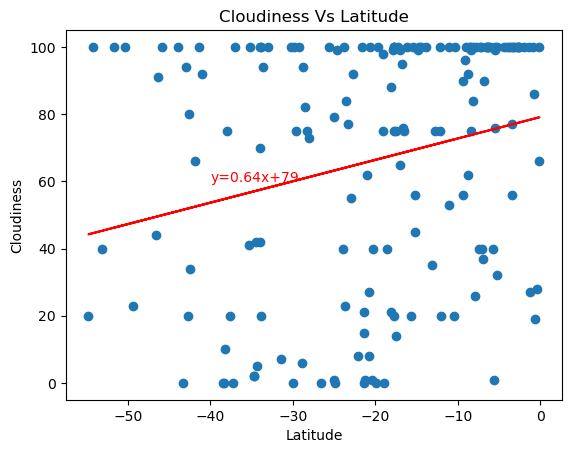

In [21]:
# Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Cloudiness"])
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(-40,60), color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness Vs Latitude")
print(f'The r^2 value is: {r_value**2}')
#print(slope)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.03240875868303122


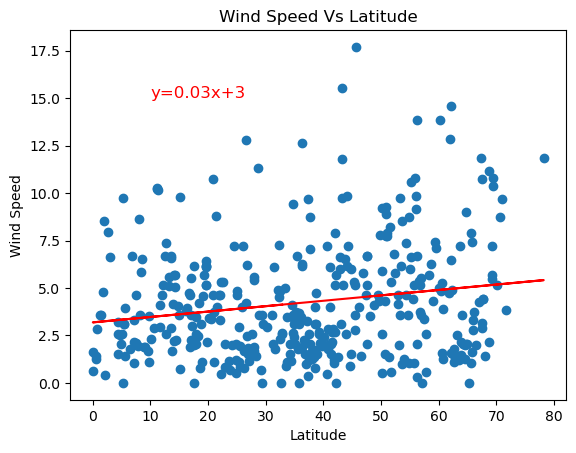

In [22]:
# Northern Hemisphere
plt.scatter(x=northern_hemi_df["Lat"],y=northern_hemi_df["Wind Speed"])
slope, intercept, r_value = linear_regress_calculation(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_value = slope * northern_hemi_df["Lat"] + intercept
plt.plot(northern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x+" + str(round(intercept))
plt.annotate(line_equ,(10,15), color='red',fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Wind Speed Vs Latitude")
print(f'The r^2 value is: {r_value**2}')

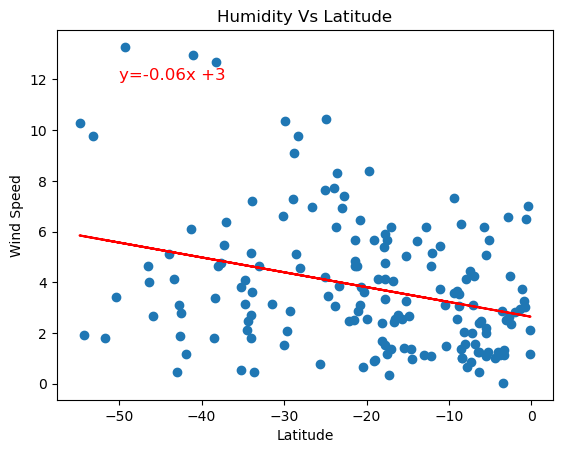

The r^2 value is: 0.0966460203735417


In [23]:
# Southern Hemisphere
plt.scatter(x=southern_hemi_df["Lat"],y=southern_hemi_df["Wind Speed"])
slope, intercept, r_value = linear_regress_calculation(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_value = slope * southern_hemi_df["Lat"] + intercept
plt.plot(southern_hemi_df["Lat"], regress_value, color='red')
line_equ = "y=" + str(round(slope,2)) + "x +" + str(round(intercept))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Humidity Vs Latitude")
plt.annotate(line_equ,(-50,12 ), color='red', fontsize=12)
plt.show()
print(f'The r^2 value is: {r_value**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE